In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FILENAME = "satellite-dev.csv"
df = pd.read_csv(FILENAME, sep=",")

In [3]:
df

,Name,Norad ID,Launch Date,Decay Date,Classification
0,SPUTNIK 1,2,Fri Oct 04 1957 00:00:00 GMT+0100 (Mitteleurop...,Fri Jan 03 1958 01:00:00 GMT+0100 (Mitteleurop...,false
1,SPUTNIK 2,3,Sun Nov 03 1957 00:00:00 GMT+0100 (Mitteleurop...,Mon Apr 14 1958 01:00:00 GMT+0100 (Mitteleurop...,false
2,EXPLORER 1,4,Sat Feb 01 1958 00:00:00 GMT+0100 (Mitteleurop...,Tue Mar 31 1970 01:00:00 GMT+0100 (Mitteleurop...,false
3,VANGUARD 1,5,Mon Mar 17 1958 00:00:00 GMT+0100 (Mitteleurop...,false,Space & Earth Science
4,EXPLORER 3,6,Wed Mar 26 1958 00:00:00 GMT+0100 (Mitteleurop...,Sat Jun 28 1958 01:00:00 GMT+0100 (Mitteleurop...,false
...,...,...,...,...,...
58989,TELKOMSAT 113BT,58995,Tue Feb 20 2024 00:00:00 GMT+0100 (Mitteleurop...,false,Geostationary
58990,FALCON 9 R/B,58996,Tue Feb 20 2024 00:00:00 GMT+0100 (Mitteleurop...,false,false
58991,AAC-AIS-SAT3,58997,Sat Nov 11 2023 00:00:00 GMT+0100 (Mitteleurop...,false,false
58992,STARLINK-31468,58998,Fri Feb 23 2024 00:00:00 GMT+0100 (Mitteleurop...,false,Starlink


In [4]:
launch_dates = df["Launch Date"]
decay_dates = df["Decay Date"]

In [5]:
lds = []
for date in launch_dates:
    lds.append(date.split(" ")[3])
    
dds = []
for date in decay_dates:
    if date == "false":
        dds.append("false")
    else:
        dds.append(date.split(" ")[3])

decay_df = pd.DataFrame({ "Decay Date": dds })
launch_df = pd.DataFrame({ "Launch Date": lds })

ndf = df.copy(deep=True)
ndf.update(decay_df)
ndf.update(launch_df)

In [6]:
columns = ["Classification"] + list(range(1957, 2025))

In [7]:
def accumulate_years(dataframe, classification):
    gdf = dataframe[dataframe["Classification"] == classification]
    
    yearly_numbers = [0] * (2026 - 1957)

    year = 1957
    satellites = 0

    for i in range(0, len(gdf.index)):
        launch_date = int(gdf.iloc[i, 2])
        decay_date = gdf.iloc[i, 3]

        # This year will be a satellite more
        yearly_numbers[launch_date - 1957] += 1

        if decay_date != "false":
            yearly_numbers[int(decay_date) - 1957 + 1] -= 1

    for i in range(0, len(yearly_numbers) - 1):
        yearly_numbers[i + 1] += yearly_numbers[i]
    yearly_numbers.pop()
    data = [classification] + yearly_numbers
    return data

In [8]:
classifiers = []
for key in ndf.groupby(["Classification"]).groups.keys():
    if key != "false":
        classifiers.append(key)
        
years = []
for classifier in classifiers:
    data = accumulate_years(ndf, classifier)
    years.append(data)

In [9]:
years_df = pd.DataFrame(years, columns=columns).set_index(['Classification'])
years_df

,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Classification,,,,,,,,,,,,,,,,,,,,,
Amateur radio,0,0,0,0,1,2,0,0,2,2,...,306,319,348,401,440,436,491,583,667,547
Beidou Navigation System,0,0,0,0,0,0,0,0,0,0,...,10,13,15,31,38,39,39,39,41,41
Brightest,0,0,0,0,0,0,1,3,3,3,...,116,118,122,124,123,127,124,123,122,117
Celestis,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,4,5,5,4
Chinese Space Station,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,5,3,2
CubeSats,0,0,0,0,0,0,0,0,0,0,...,225,180,148,138,116,114,113,109,107,103
Disaster monitoring,0,0,0,0,0,0,0,0,0,0,...,26,25,24,24,24,24,24,24,24,22
Earth resources,0,0,0,0,0,0,0,0,0,0,...,122,130,132,136,136,136,135,133,133,129
Education,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


In [10]:
constellations = [
    'Starlink',
    'Orbcomm',
    'OneWeb',
    'Beidou Navigation System',
    'Westford Needles',
    'O3B Networks',
    'Intelsat'
]

START_YEAR = 2000
CURRENT_YEAR = 2025

vdf = years_df.filter(items=list(range(START_YEAR, CURRENT_YEAR)))
vdf = vdf.loc[constellations]

vdf

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Classification,,,,,,,,,,,,,,,,,,,,,
Starlink,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,120,943,1871,3478,5322,5415
Orbcomm,38,39,39,39,39,39,39,39,46,46,...,63,63,63,63,63,63,63,63,63,61
OneWeb,0,0,0,0,0,0,0,0,0,2,...,2,2,2,2,3,104,388,498,628,628
Beidou Navigation System,0,0,0,0,0,0,0,0,0,0,...,10,13,15,31,38,39,39,39,41,41
Westford Needles,56,54,52,50,50,50,49,49,48,48,...,48,47,47,47,46,46,45,45,44,44
O3B Networks,0,0,0,0,0,0,0,0,0,0,...,12,12,12,16,20,20,20,20,20,20
Intelsat,56,58,62,63,64,65,65,66,66,67,...,73,74,74,74,74,74,74,74,74,74


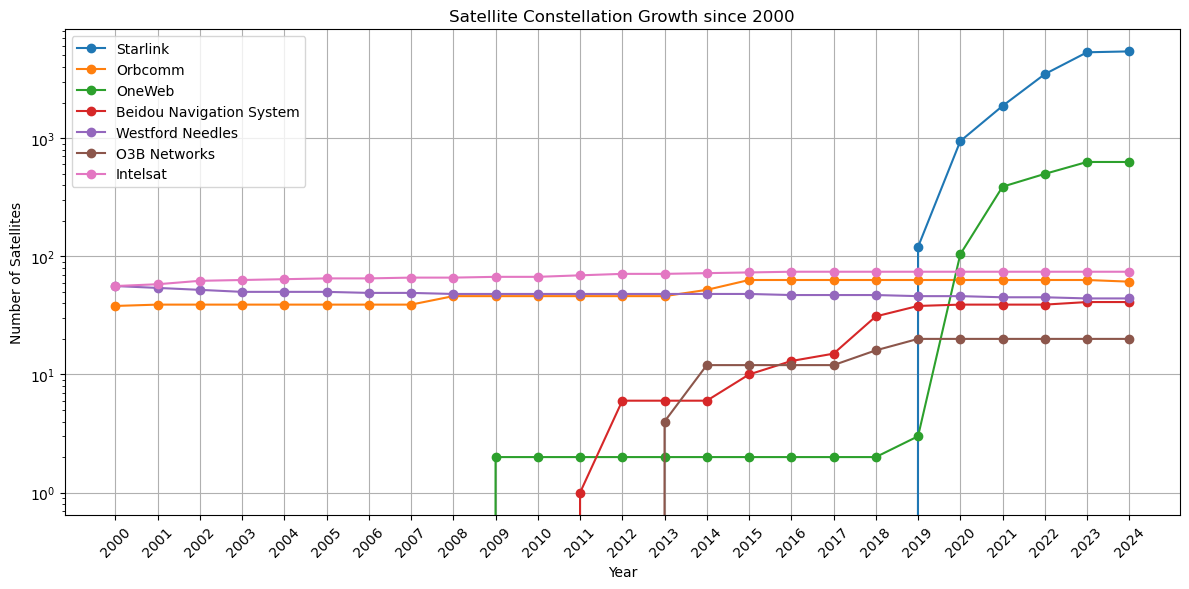

In [11]:
plt.figure(figsize=(12, 6))
for constellation in constellations:
    plt.plot(vdf.columns, vdf.loc[constellation], marker='o', label=constellation)
plt.title('Satellite Constellation Growth since ' + str(START_YEAR))
plt.xlabel('Year')
plt.ylabel('Number of Satellites')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(vdf.columns), max(vdf.columns)+1, 1), rotation=45)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.tight_layout()
plt.savefig('satellite-dev.png')